## Import Data Section

In [1]:
import ast

#Reading File and Trun into Array
with open(f"Merged_annotation_SN001.txt",'r') as file:
    text = file.read().split('\n')
res = []
for item in text:
    res.append(ast.literal_eval(item))

In [2]:
type(res[0][0])

int

In [3]:
print(len(res))
res[:5]

58


[[33, 210, 'Sleep stage W'],
 [210, 450, 'Sleep stage N1'],
 [510, 690, 'Sleep stage N2'],
 [690, 750, 'Sleep stage N1'],
 [780, 960, 'Sleep stage N1']]

In [4]:
#Dump First Arr due to less value of subtraction
res.pop(0)
res[:5]

[[210, 450, 'Sleep stage N1'],
 [510, 690, 'Sleep stage N2'],
 [690, 750, 'Sleep stage N1'],
 [780, 960, 'Sleep stage N1'],
 [1020, 1140, 'Sleep stage W']]

In [4]:
dt[3][1][::180]

NameError: name 'dt' is not defined

In [32]:
df = []
tz = []
for i in res:
    if i[1] - i[0] > 180:
        tz.append(i)
        rng = int((i[1] - i[0]) / 180)
        # print(rng)
        if rng == 1 :
            df.append([i[0], i[0]+180, i[2]])
        else:
            # cp = i
            z=1
            for item in range(rng):
                if z == 1:
                    df.append([i[0], i[0] + 180, i[2]])
                else:
                    df.append([df[-1][1], df[-1][1]+180, i[2]])
                z+=1


In [31]:
del df

In [35]:
df[:12]

[[210, 390, 'Sleep stage N1'],
 [1140, 1320, 'Sleep stage N1'],
 [1320, 1500, 'Sleep stage N1'],
 [1500, 1680, 'Sleep stage N2'],
 [1680, 1860, 'Sleep stage N2'],
 [1860, 2040, 'Sleep stage N2'],
 [2040, 2220, 'Sleep stage N2'],
 [2220, 2400, 'Sleep stage N2'],
 [2460, 2640, 'Sleep stage N2'],
 [2640, 2820, 'Sleep stage N2'],
 [2820, 3000, 'Sleep stage N2'],
 [3630, 3810, 'Sleep stage N2']]

In [36]:
print(len(df))

109


In [34]:
tz[:5]

[[210, 450, 'Sleep stage N1'],
 [1140, 1500, 'Sleep stage N1'],
 [1500, 2430, 'Sleep stage N2'],
 [2460, 3120, 'Sleep stage N2'],
 [3630, 4170, 'Sleep stage N2']]

# Call Lib for Reaching HRV Values

In [37]:
import pantompkins as pt
import numpy as np
import matplotlib.pyplot as plt

In [38]:
ECG_BP,ECG = pt.BandPassECG('SN001.edf',256)

Extracting EDF parameters from c:\Users\Mreza\Documents\Jupyter\Signal\SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


#### Get Familiar With Signal

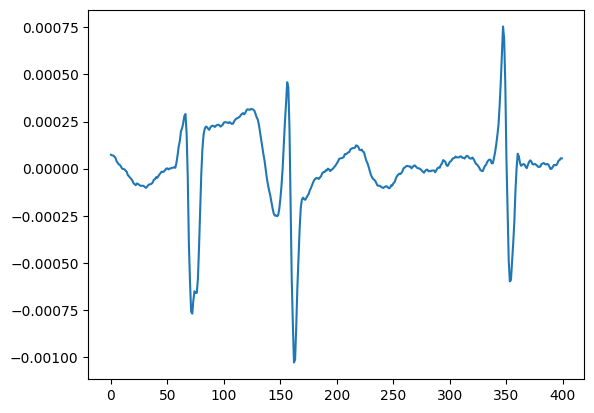

In [39]:
plt.plot(ECG[:400])

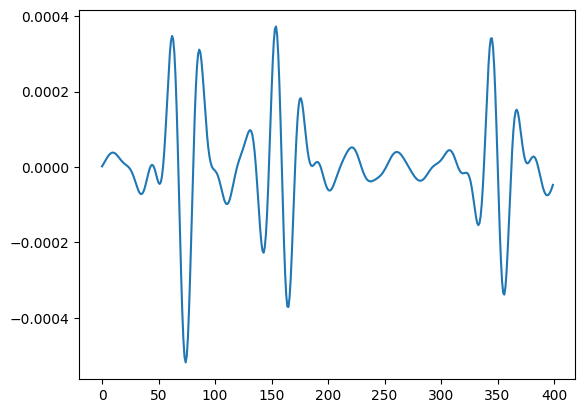

In [40]:
plt.plot(ECG_BP[:400])

In [41]:
ECG_df = pt.Differentiate(ECG_BP)

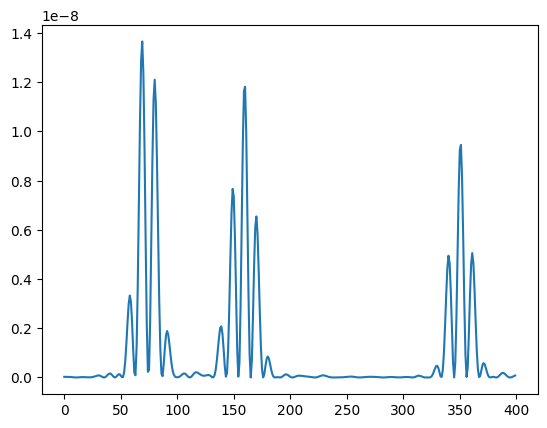

In [42]:
plt.plot(ECG_df[:400])

In [43]:
ECG_ma = pt.MovingAverage(ECG_df)

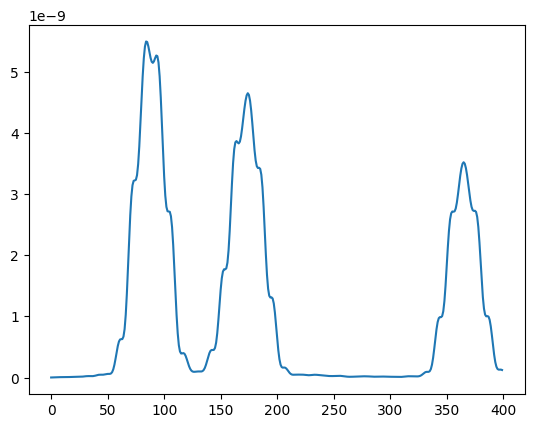

In [44]:
plt.plot(ECG_ma[:400])

In [45]:
R_peaks = pt.QRSpeaks(ECG_ma, 256)

In [46]:
R_peaks[:10]

array([  84,  174,  365,  483,  606,  885, 1079, 1352, 1474, 1592],
      dtype=int64)

In [47]:
HRV = np.diff(R_peaks)

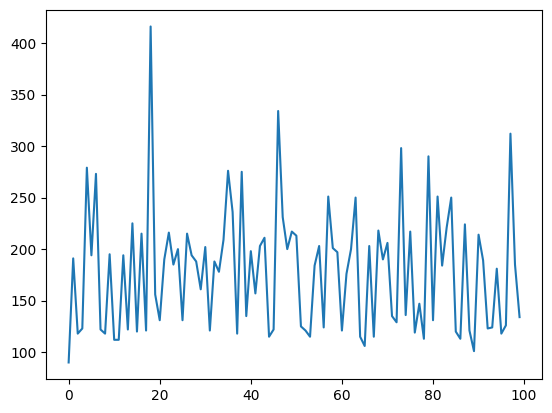

In [48]:
plt.plot(HRV[:100])

In [52]:
def get_time_f(arr, Fs=256):
    df_new = []
    for item in arr:
        df_new.append([item[0] * Fs, item[1]* Fs, item[2]])
    # return [arr[0]*Fs, arr[1]*Fs, arr[2]]
    return df_new

In [53]:
fixedtime_df = get_time_f(df)

In [55]:
df[:5]

[[210, 390, 'Sleep stage N1'],
 [1140, 1320, 'Sleep stage N1'],
 [1320, 1500, 'Sleep stage N1'],
 [1500, 1680, 'Sleep stage N2'],
 [1680, 1860, 'Sleep stage N2']]

In [54]:
fixedtime_df[:5]

[[53760, 99840, 'Sleep stage N1'],
 [291840, 337920, 'Sleep stage N1'],
 [337920, 384000, 'Sleep stage N1'],
 [384000, 430080, 'Sleep stage N2'],
 [430080, 476160, 'Sleep stage N2']]

# Split R Peaks by Annotation

In [63]:
print(len(R_peaks))
R_peaks[:10]

37887


array([  84,  174,  365,  483,  606,  885, 1079, 1352, 1474, 1592],
      dtype=int64)

In [68]:
def splitter(annot, rpeaks = R_peaks):
    points = []
    start = annot[0]
    end = annot[1]
    for i in rpeaks:
        if i >= start and i <= end:
            points.append(i)
        else:
            pass
    return points

In [75]:
pts = splitter(fixedtime_df[0])

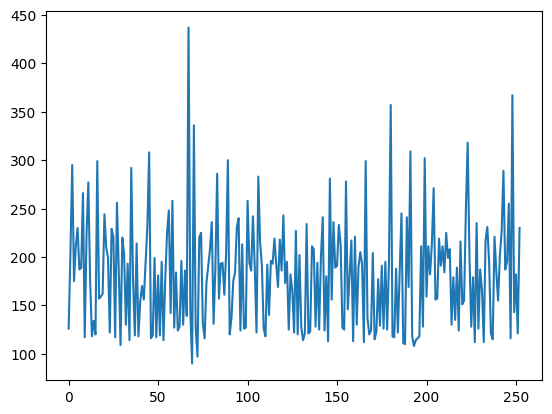

In [78]:
plt.plot(np.diff(pts))